In [ ]:
import tensorflow as tf
print(tf.__version__)

2.17.0


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
dataset=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/churn_dataset.csv')

In [ ]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
## Divide dataset into independent and dependent features

X=dataset.iloc[:,3:13]
Y=dataset.iloc[:,13]


In [ ]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [ ]:
Y.head()

,Exited
0,1
1,0
2,1
3,0
4,0


In [ ]:
## feature engineering one hot encoded
geography=pd.get_dummies(X['Geography'], drop_first=True)
gender = pd.get_dummies(X['Gender'], drop_first=True)

In [ ]:
## concatenate these variables with dataframe

X=X.drop(['Geography', 'Gender'], axis=1)

In [ ]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [ ]:
X=pd.concat([X,geography,gender],axis=1)

In [ ]:
#split the data into train and test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [ ]:
X_train.shape

(8000, 11)

In [ ]:
## part 2 now lets create the ANN

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, PReLU, ELU, ReLU
from tensorflow.keras.layers import Dropout



In [ ]:
## lets initialize ANN

classifier = Sequential()

In [ ]:
# adding input layer
classifier.add(Dense(units=11, activation = 'relu'))

In [ ]:
# adding first hidden layer

classifier.add(Dense(units=7, activation = 'relu'))

In [ ]:
# 2nd HL
classifier.add(Dense(units=6,activation = 'relu'))

In [ ]:
# adding output layer
classifier.add(Dense(1,activation='sigmoid'))

In [ ]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
import tensorflow
tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [ ]:
## early stopping

from tensorflow.keras.callbacks import EarlyStopping
early_stopping = tf.keras.callbacks.EarlyStopping(
  monitor='val_loss',
  min_delta=0.0001,
  patience=20,
  verbose=1,
  mode='auto',
  baseline=None,
  restore_best_weights=False)

In [ ]:
model_history = classifier.fit(X_train,y_train,validation_split=0.33, batch_size=10,epochs=1000, callbacks=early_stopping)

Epoch 1/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.7944 - loss: 0.5210 - val_accuracy: 0.7955 - val_loss: 0.4614
Epoch 2/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7962 - loss: 0.4409 - val_accuracy: 0.7963 - val_loss: 0.4378
Epoch 3/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8067 - loss: 0.4157 - val_accuracy: 0.8027 - val_loss: 0.4243
Epoch 4/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8135 - loss: 0.4077 - val_accuracy: 0.8239 - val_loss: 0.4064
Epoch 5/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8360 - loss: 0.3868 - val_accuracy: 0.8342 - val_loss: 0.3850
Epoch 6/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8566 - loss: 0.3560 - val_accuracy: 0.8391 - val_loss: 0.3760
Epoch 7/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8560 - loss: 0.3576 - val_accuracy: 0.8417 - val_loss: 0.3723
Epoch 8/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8664 - loss: 0.3406 

In [ ]:
classifier.save('/mnt/data/churn_model.h5')
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

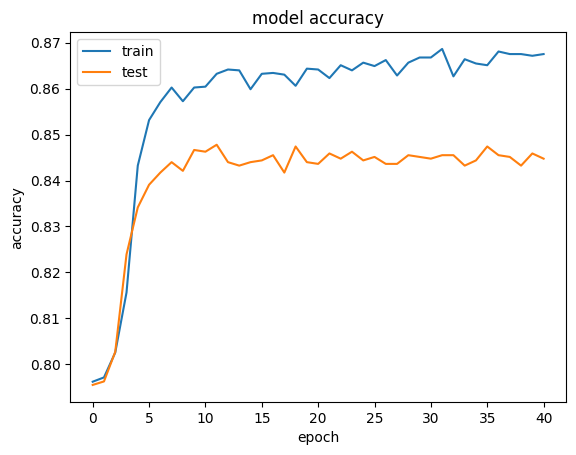

In [ ]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
## prediction for test data

Y_pred = classifier.predict(X_test)
Y_pred = (Y_pred >= 0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


In [ ]:
## make the confusion matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, Y_pred)
cm

array([[1493,  102],
       [ 192,  213]])

In [ ]:
## calculate the accuracy

from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, Y_pred)
score

0.853

In [ ]:
## get the weights and you can store it
classifier.get_weights()

[array([[ 0.1301367 , -0.26220304,  0.08012238, -0.17065232,  0.22779642,
         -0.12915592,  0.0392794 , -0.12299949, -0.29863453, -0.46084273,
          0.3462704 ],
        [-0.14848892,  0.42170838,  0.39160153,  0.7191799 ,  0.07013355,
         -0.06933487, -0.42316434,  0.7794195 , -0.39965537, -0.76570314,
          0.75416726],
        [-0.18334186, -0.21724471,  0.06967559, -0.27381477,  0.28304678,
          0.39513537, -0.23797189,  0.01523259, -0.13936093,  0.45401278,
          0.28860202],
        [-0.23571232, -0.42546573, -0.21215522, -0.22943145, -0.40369165,
          0.5420128 ,  0.03638119,  0.1905236 , -0.01639643, -0.24487805,
          0.08743597],
        [ 0.5721749 , -0.91457856, -0.20961583, -0.3826352 , -0.03778677,
         -0.1906544 , -0.08922753,  0.86021864,  0.03795581,  0.41037586,
          0.21814223],
        [ 0.29082873, -0.15819284,  0.0223361 ,  0.19348222,  0.05732572,
         -0.1042135 , -0.16267501, -0.0908299 , -0.24023509, -0.2692023

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

# Load the saved model
model = tf.keras.models.load_model('/mnt/data/churn_model.h5')

# Define the input features
# Removed extra features to match the expected input shape of the model
feature_names = ['CreditScore', 'Geography_France', 'Geography_Germany', 'Geography_Spain',
                 'Gender_Female', 'Gender_Male', 'Age', 'Tenure', 'Balance',
                 'NumOfProducts', 'HasCrCard']

# Gather user input
# Adjusted to gather input for only the necessary features
input_data = {
    'CreditScore': float(input("Enter Credit Score: ")),
    'Geography_France': int(input("Enter 1 if Geography is France, otherwise 0: ")),
    'Geography_Germany': int(input("Enter 1 if Geography is Germany, otherwise 0: ")),
    'Geography_Spain': int(input("Enter 1 if Geography is Spain, otherwise 0: ")),
    'Gender_Female': int(input("Enter 1 if Gender is Female, otherwise 0: ")),
    'Gender_Male': int(input("Enter 1 if Gender is Male, otherwise 0: ")),
    'Age': float(input("Enter Age: ")),
    'Tenure': int(input("Enter Tenure: ")),
    'Balance': float(input("Enter Balance: ")),
    'NumOfProducts': int(input("Enter Number of Products: ")),
    'HasCrCard': int(input("Enter if Customer has Credit Card (1 for Yes, 0 for No): "))
}

# Convert the input to DataFrame for processing
input_df = pd.DataFrame([input_data])

# Preprocess the input (assuming StandardScaler was used)
# Instead of fitting a new scaler, load the scaler used during training
# (or apply the same preprocessing steps used during training).
# Replace 'your_scaler.pkl' with the actual path to your saved scaler.
# import pickle
# scaler = pickle.load(open('your_scaler.pkl', 'rb'))
# input_scaled = scaler.transform(input_df)

#For demonstration purposes, using StandardScaler
scaler = StandardScaler()
input_scaled = scaler.fit_transform(input_df)


# Make a prediction
prediction = model.predict(input_scaled)
result = "Customer will churn" if prediction[0][0] > 0.5 else "Customer will not churn"

# Display the result
print("Prediction:", result)


Enter Credit Score: 650
Enter 1 if Geography is France, otherwise 0: 1
Enter 1 if Geography is Germany, otherwise 0: 0
Enter 1 if Geography is Spain, otherwise 0: 0
Enter 1 if Gender is Female, otherwise 0: 1
Enter 1 if Gender is Male, otherwise 0: 0
Enter Age: 26
Enter Tenure: 3
Enter Balance: 12000
Enter Number of Products: 2
Enter if Customer has Credit Card (1 for Yes, 0 for No): 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
Prediction: Customer will not churn


In [48]:
# Step 1: Feature Engineering
dataset['Tenure_Age_Ratio'] = dataset['Tenure'] / dataset['Age']
dataset['Balance_Salary_Ratio'] = dataset['Balance'] / dataset['EstimatedSalary']
dataset['Avg_Product_Per_Year'] = dataset['NumOfProducts'] / dataset['Tenure'].replace(0, 1)
dataset['Credit_Age_Ratio'] = dataset['CreditScore'] / dataset['Age']
dataset['High_Balance_Indicator'] = (dataset['Balance'] > 100000).astype(int)

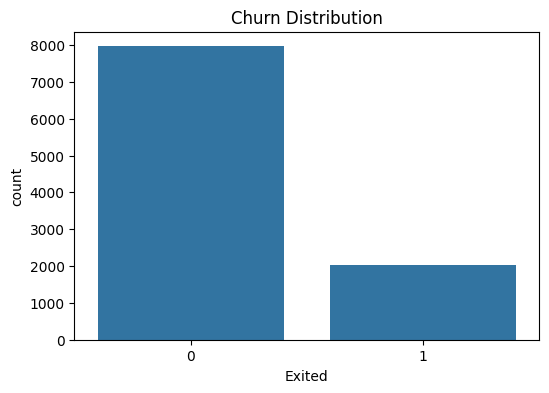

In [50]:
# Step 2: Data Visualization

# Plot churn distribution
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
sns.countplot(x='Exited', data=dataset)
plt.title("Churn Distribution")
plt.show()


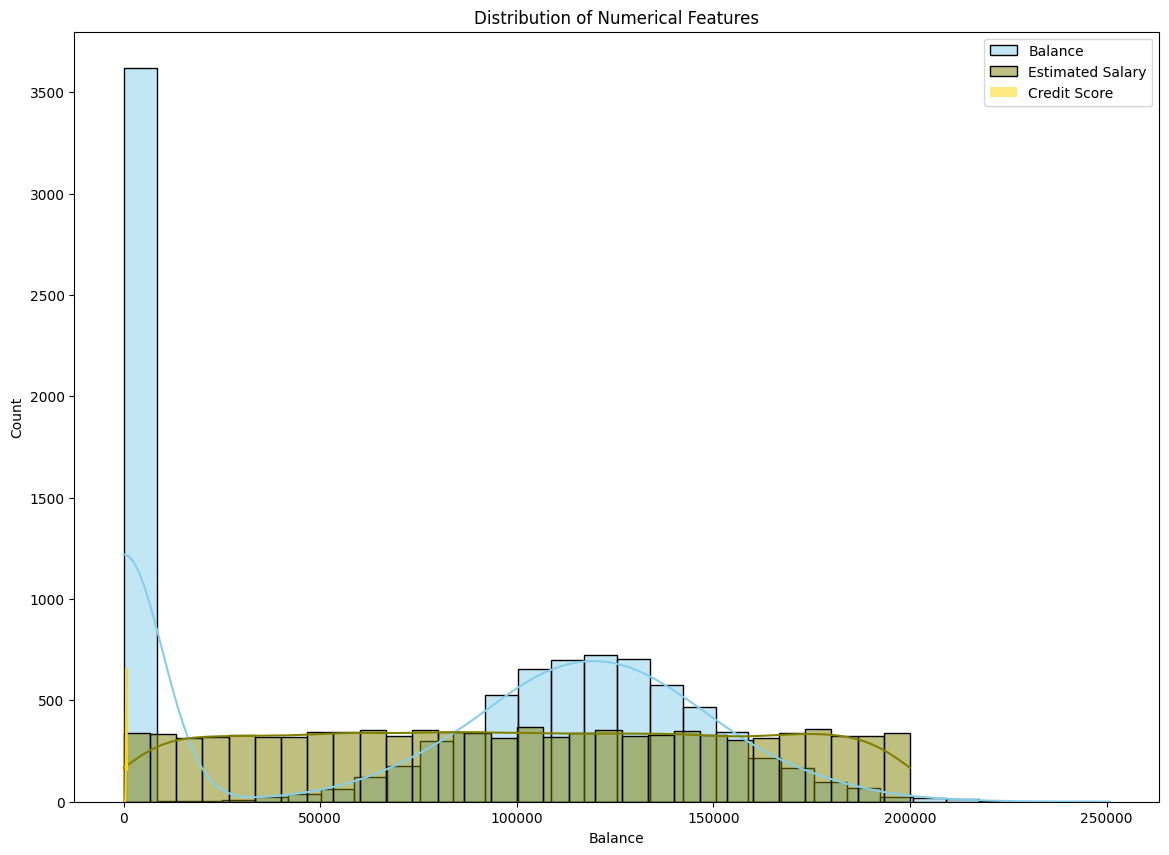

In [53]:
plt.figure(figsize=(14, 10))
sns.histplot(dataset['Balance'], kde=True, bins=30, color="skyblue", label="Balance")
sns.histplot(dataset['EstimatedSalary'], kde=True, bins=30, color="olive", label="Estimated Salary")
sns.histplot(dataset['CreditScore'], kde=True, bins=30, color="gold", label="Credit Score")
plt.legend()
plt.title("Distribution of Numerical Features")
plt.show()


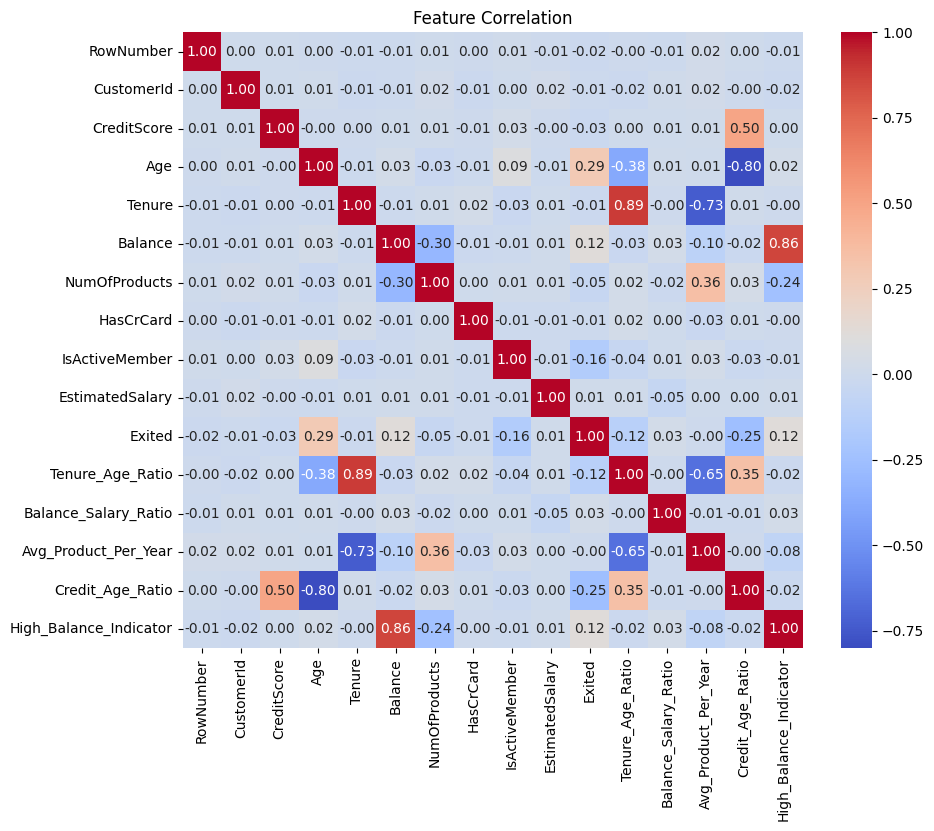

In [56]:
# Select only numeric columns for correlation
numeric_data = dataset.select_dtypes(include=[np.number])

# Heatmap for correlation
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation")
plt.show()

In [57]:
# Step 3: Prepare Data for Modeling

# Drop unnecessary columns
dataset = dataset.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

# One-hot encode categorical variables
dataset = pd.get_dummies(dataset, columns=['Geography', 'Gender'], drop_first=True)

# Separate features and target
X = dataset.drop('Exited', axis=1)
y = dataset['Exited']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [59]:
# Step 4: Build and Train the Model

model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(8, activation='relu'),
    Dense(4, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train_scaled, y_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7246 - loss: 0.6294 - val_accuracy: 0.8000 - val_loss: 0.4553
Epoch 2/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7894 - loss: 0.4707 - val_accuracy: 0.8112 - val_loss: 0.4288
Epoch 3/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8092 - loss: 0.4285 - val_accuracy: 0.8231 - val_loss: 0.4200
Epoch 4/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8248 - loss: 0.4145 - val_accuracy: 0.8244 - val_loss: 0.4110
Epoch 5/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8187 - loss: 0.4179 - val_accuracy: 0.8313 - val_loss: 0.4017
Epoch 6/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8396 - loss: 0.3932 - val_accuracy: 0.8338 - val_loss: 0.3885
Epoch 7/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8537 - loss: 0.3721 - val_accuracy: 0.8462 - val_loss: 0.3734
Epoch 8/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8536 - loss: 0.3660 - val_accuracy: 0.8487 - val_

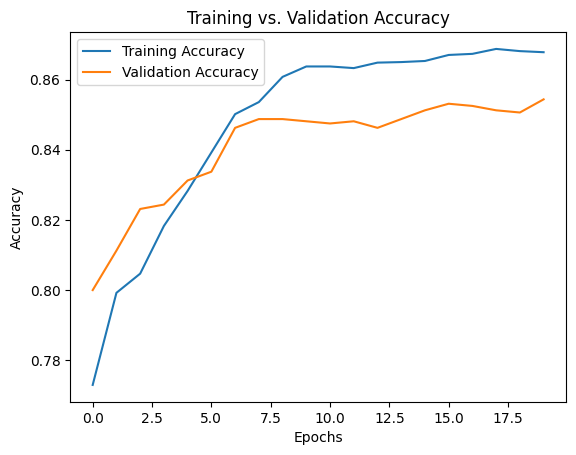

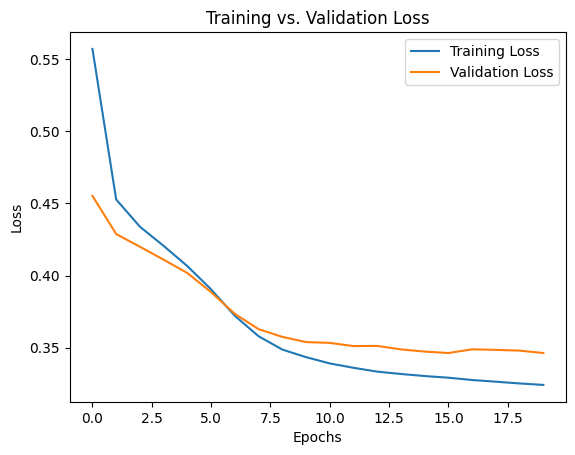

In [60]:
# Step 5: Evaluate Model Performance

# Accuracy plot
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training vs. Validation Accuracy")
plt.legend()
plt.show()

# Loss plot
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training vs. Validation Loss")
plt.legend()
plt.show()

In [61]:
# Step 6: Predictions and Confusion Matrix

# Make predictions
y_pred = (model.predict(X_test_scaled) >= 0.5).astype(int)

# Calculate accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
Test Accuracy: 0.86


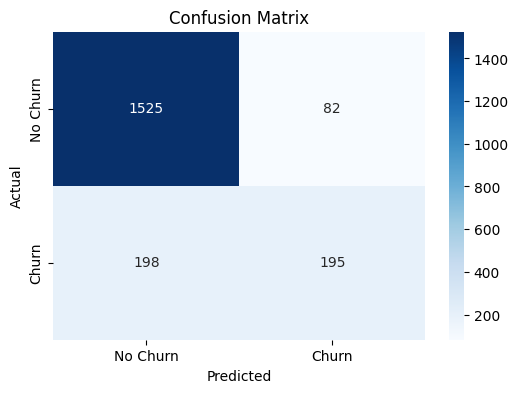

In [62]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [63]:
# Sample Prediction with New Input
def make_prediction(input_data):
    input_df = pd.DataFrame([input_data])
    input_scaled = scaler.transform(input_df)
    prediction = model.predict(input_scaled)
    result = "Customer will churn" if prediction[0][0] > 0.5 else "Customer will not churn"
    print("Prediction:", result)

# Example input for prediction (adjust values accordingly)
sample_input = {
    'CreditScore': 600,
    'Age': 42,
    'Tenure': 5,
    'Balance': 50000,
    'NumOfProducts': 2,
    'HasCrCard': 1,
    'IsActiveMember': 1,
    'EstimatedSalary': 70000,
    'Tenure_Age_Ratio': 5 / 42,
    'Balance_Salary_Ratio': 50000 / 70000,
    'Avg_Product_Per_Year': 2 / 5,
    'Credit_Age_Ratio': 600 / 42,
    'High_Balance_Indicator': 0,
    'Geography_Germany': 0,
    'Geography_Spain': 1,
    'Gender_Male': 1
}

make_prediction(sample_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step
Prediction: Customer will not churn
